RED WINE QULAITY PREDICTION PROJECT :

In [1]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import RocCurveDisplay

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\winequality-red.csv")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
df.shape

(1599, 12)

In [4]:
#checking for missing value 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#statistical measures of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.skew()  #acceptable range is =/-0.5

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

DATA VISUALIZATION

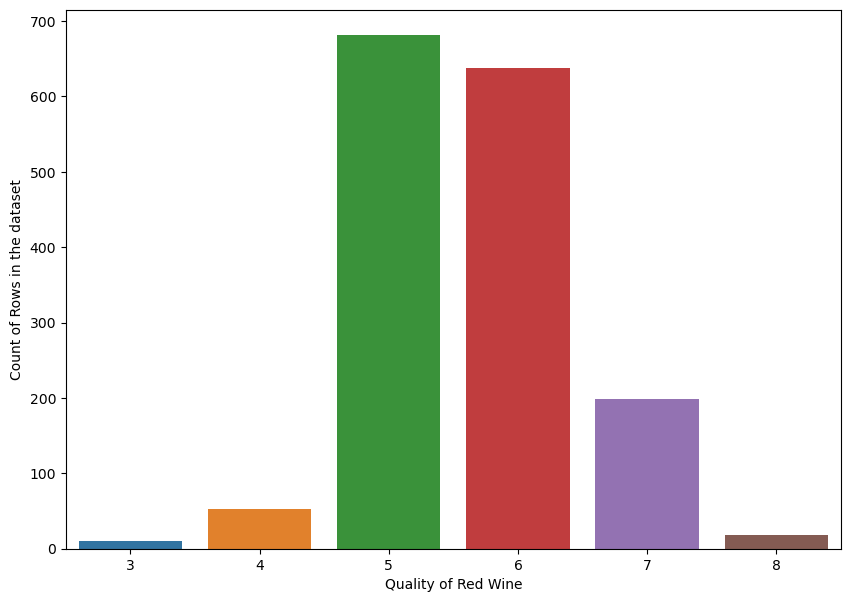

In [8]:
plt.figure(figsize=(10,7))
sns.countplot(x ='quality', data = df)
plt.xlabel('Quality of Red Wine')
plt.ylabel('Count of Rows in the dataset')
plt.show()

In the countplot representation we see the various categories of red wine quality and it shows that the number of data present for quality score 5 and 6 is way higher than it's counterparts. This indicates an imbalance which will need to be rectified so that our machine learning model do not get biased to a certain value during prediction.

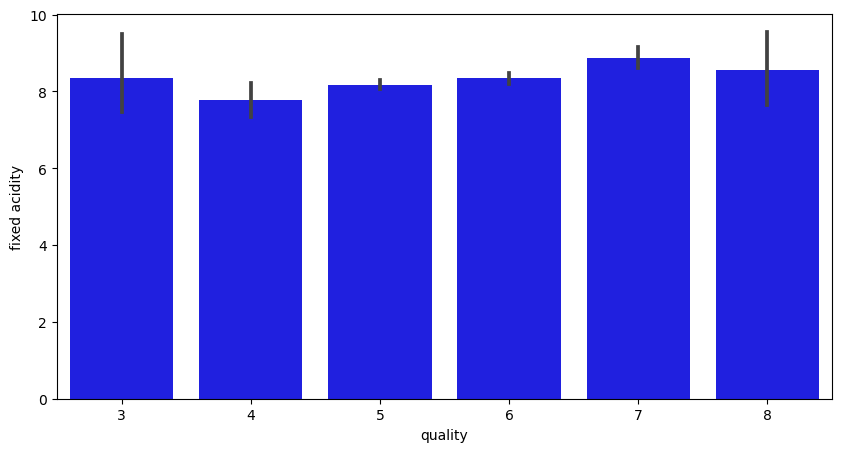

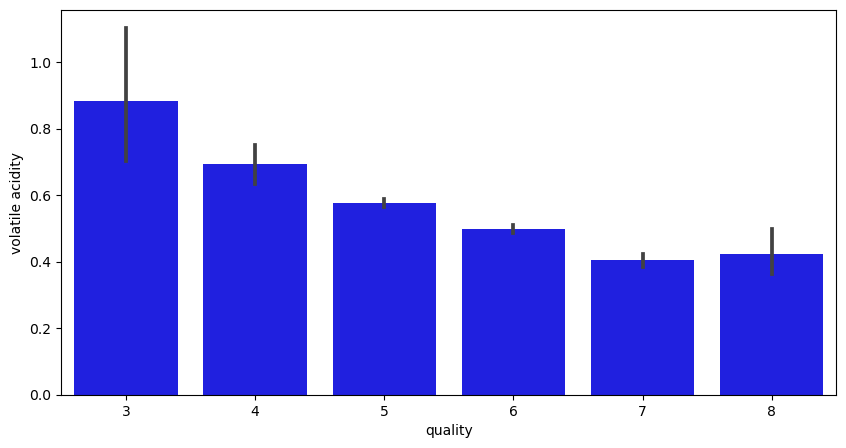

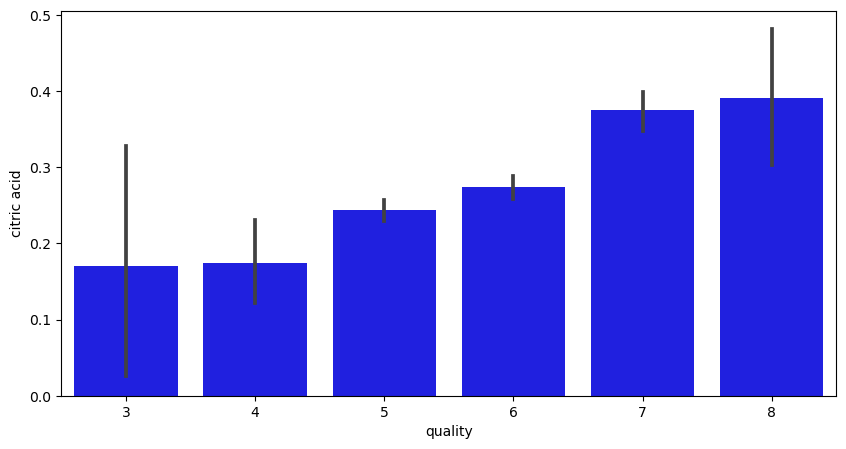

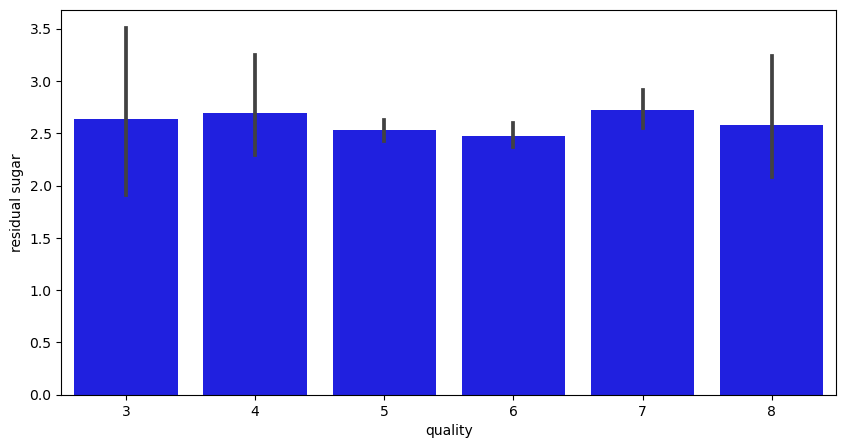

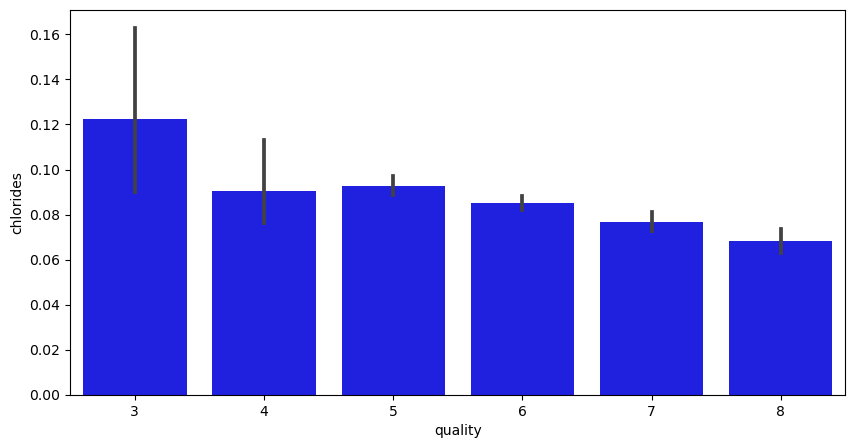

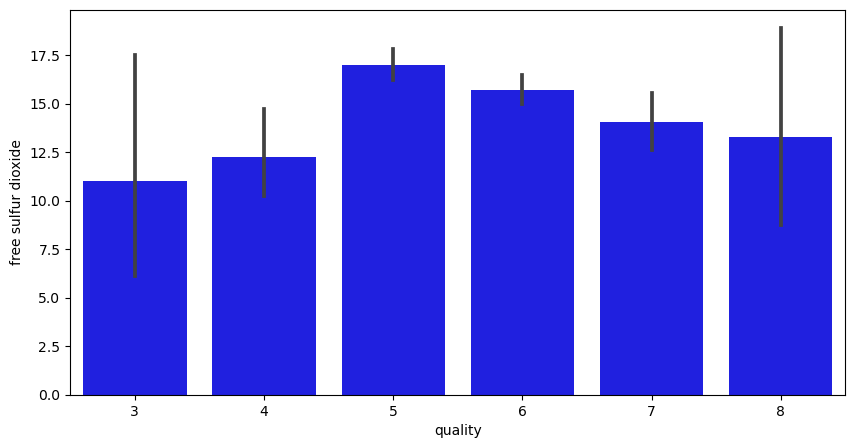

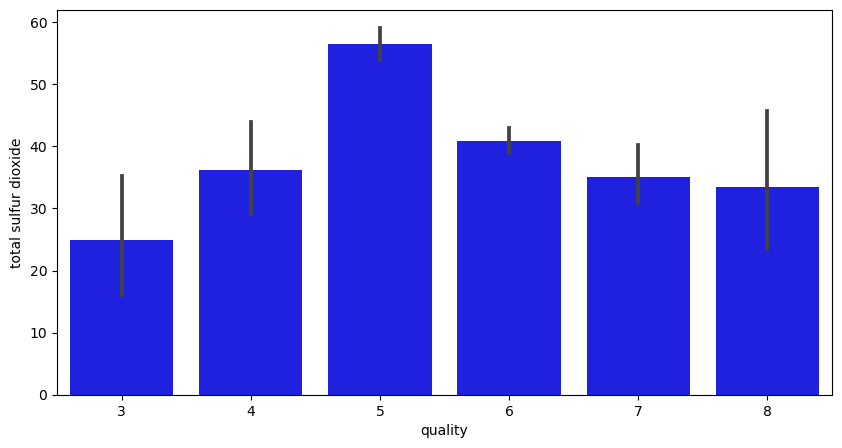

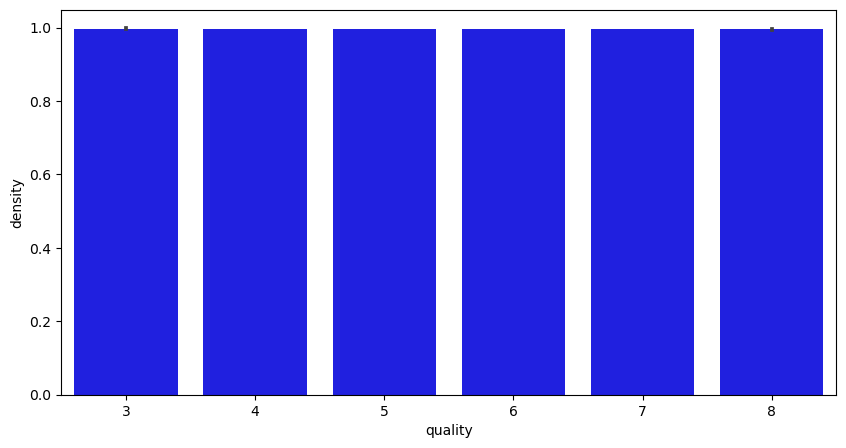

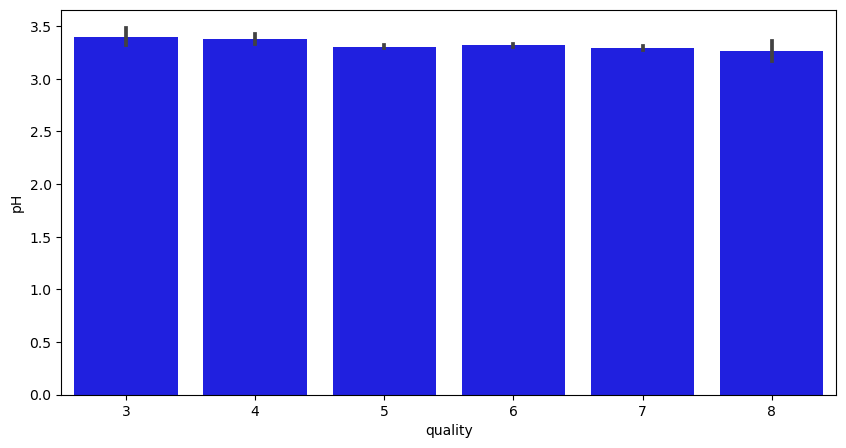

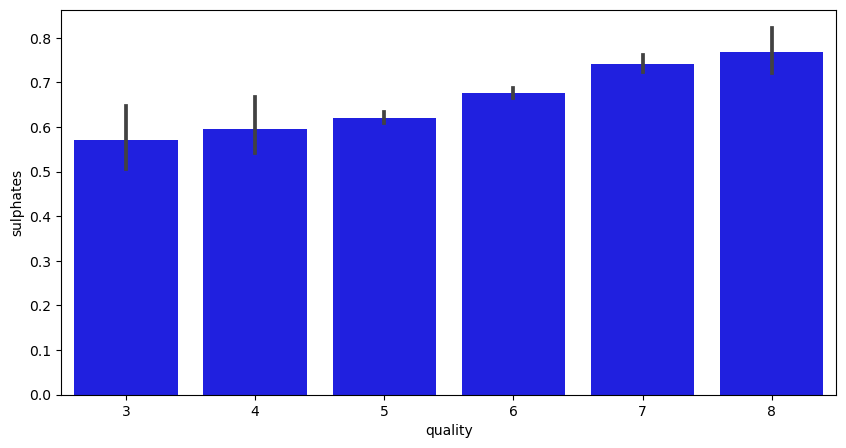

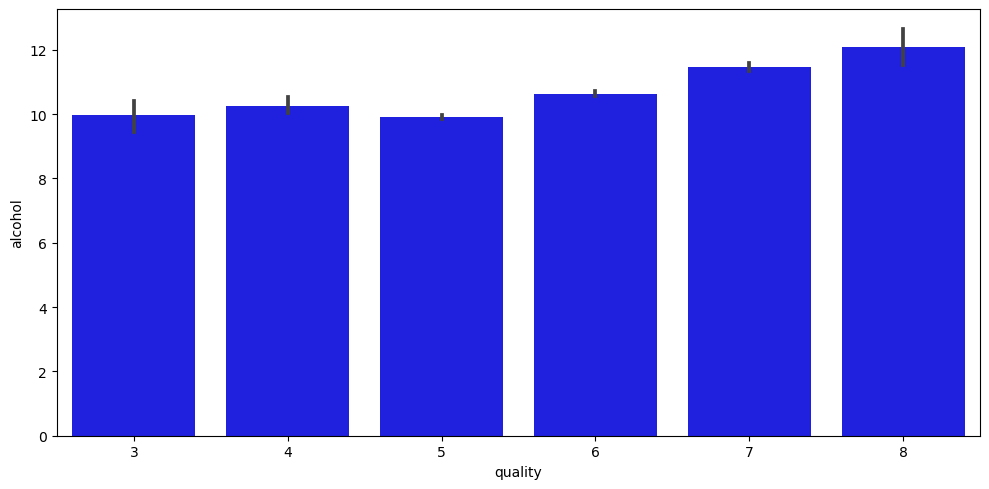

In [9]:
index=0
labels = df['quality']
features = df.drop('quality', axis=1)

for col in features.items():
    plt.figure(figsize=(10,5))
    sns.barplot(x=labels, y=col[index], data=df, color="blue")
plt.tight_layout()
plt.show()

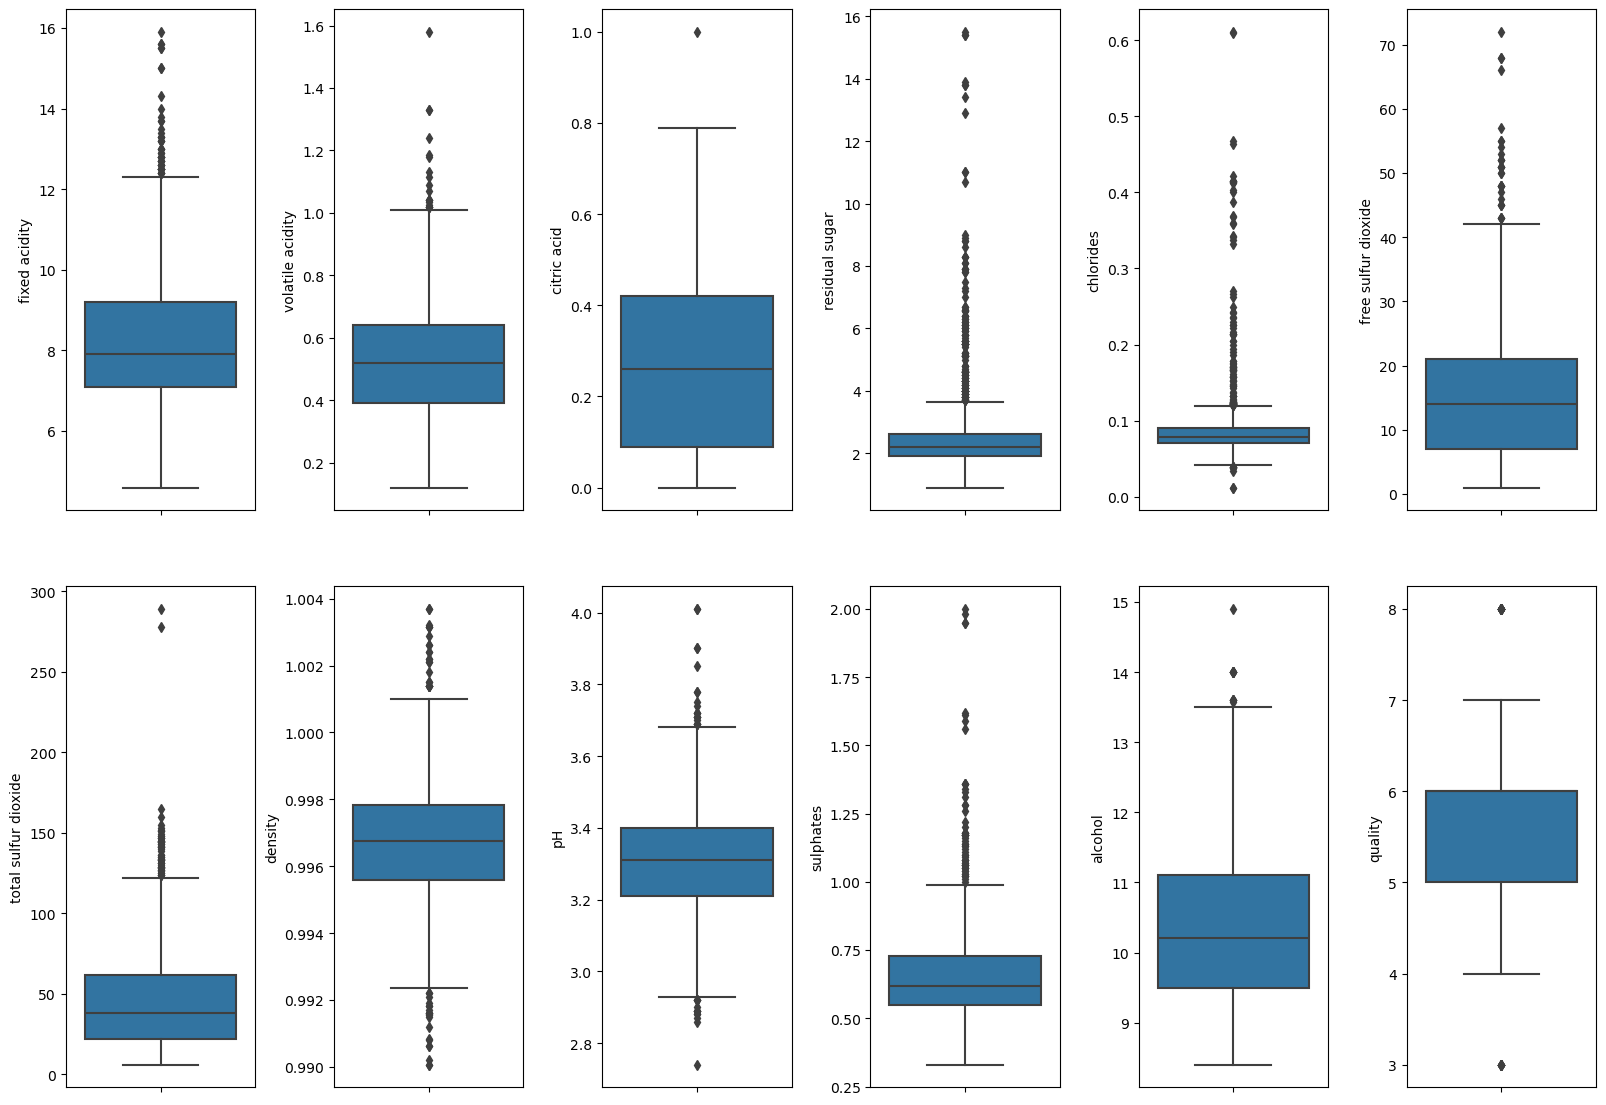

In [10]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(16,11))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

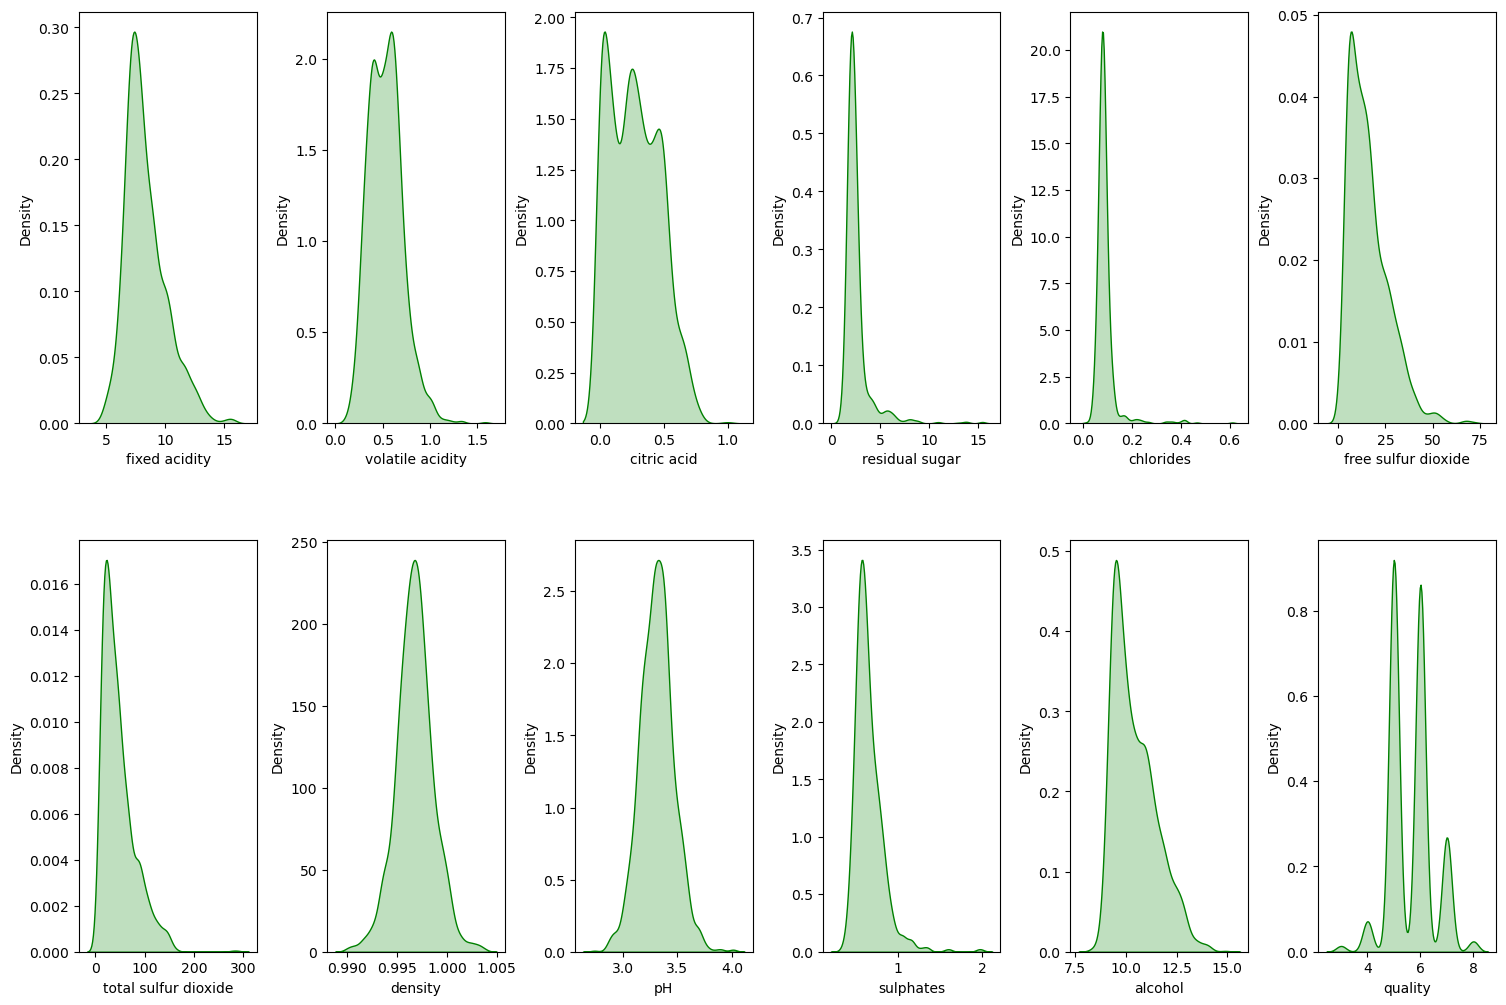

In [11]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="g", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Correlation using a Heatmap

Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.

Negative correlation - A correlation of -1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

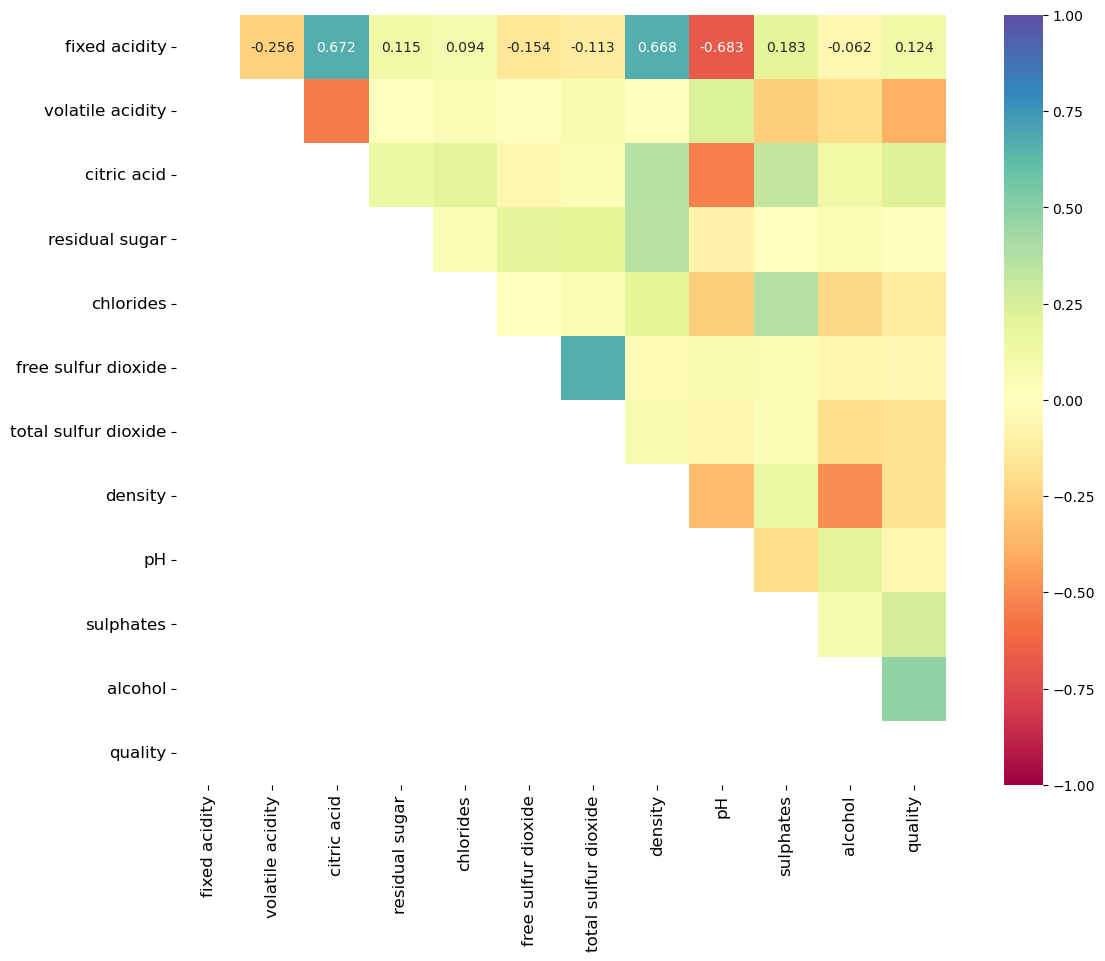

In [14]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="Spectral", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

DROPPING A COLUMN

In [15]:
df = df.drop('free sulfur dioxide', axis=1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
# Percentage of Data Loss

data_loss=(1599-1464)/1599*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

8.442776735459661

Data Preprocessing

In [17]:
X = df.drop('quality', axis=1)
Y = df['quality']

In [18]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      total sulfur dioxide 

In [19]:
Y = Y.apply(lambda y_value:1 if y_value>=7 else 0) # 1 is for good quality and 0 for bad (not good) quality
Y # Displaying the label after applying label binarization

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [20]:
X # Displaying all the features except the label

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,44.0,0.99547,3.57,0.71,10.2


In [21]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,-0.075043,-0.676657,1.677400,0.305990,-0.209308


Train and Test Data

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [24]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score

In [25]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 87.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       279
           1       0.54      0.34      0.42        41

    accuracy                           0.88       320
   macro avg       0.72      0.65      0.67       320
weighted avg       0.86      0.88      0.87       320

Cross Validation Score: 86.74275078369907


In [26]:
 #Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 90.3125

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       279
           1       0.69      0.44      0.54        41

    accuracy                           0.90       320
   macro avg       0.81      0.71      0.74       320
weighted avg       0.89      0.90      0.89       320

Cross Validation Score: 87.05446708463951


In [27]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 87.1875

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       279
           1       0.50      0.68      0.58        41

    accuracy                           0.87       320
   macro avg       0.73      0.79      0.75       320
weighted avg       0.89      0.87      0.88       320

Cross Validation Score: 81.23785266457679


In [28]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 91.25

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       279
           1       0.70      0.56      0.62        41

    accuracy                           0.91       320
   macro avg       0.82      0.76      0.79       320
weighted avg       0.91      0.91      0.91       320

Cross Validation Score: 86.67985893416927


In [29]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 88.75

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       279
           1       0.57      0.49      0.53        41

    accuracy                           0.89       320
   macro avg       0.75      0.72      0.73       320
weighted avg       0.88      0.89      0.88       320

Cross Validation Score: 85.9921630094044


In [30]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 92.1875

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       279
           1       0.75      0.59      0.66        41

    accuracy                           0.92       320
   macro avg       0.85      0.78      0.81       320
weighted avg       0.92      0.92      0.92       320

Cross Validation Score: 86.80485893416929


Hyper parameter tuning on the best ML Model

In [31]:
# Choosing Support Vector Classifier

svc_param = {'kernel' : ['poly', 'sigmoid', 'rbf'],
             'gamma' : ['scale', 'auto'],
             'shrinking' : [True, False],
             'random_state' : [21,42,104],
             'probability' : [True, False],
             'decision_function_shape' : ['ovo', 'ovr'],
             'verbose' : [True, False]}

After comparing all the classification models I have selected Support Vector Classifier as my best model and have listed down it's parameters above referring the sklearn webpage.

In [32]:
GSCV = GridSearchCV(SVC(), svc_param, cv=5)

I am using the Grid Search CV method for hyper parameter tuning my best model.



In [33]:
GSCV.fit(X_train,Y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['poly', 'sigmoid', 'rbf'],
                         'probability': [True, False],
                         'random_state': [21, 42, 104],
                         'shrinking': [True, False], 'verbose': [True, False]})

I have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes.



In [34]:
GSCV.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'auto',
 'kernel': 'rbf',
 'probability': True,
 'random_state': 21,
 'shrinking': True,
 'verbose': True}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model.



In [35]:
Final_Model = SVC(decision_function_shape='ovo', gamma='scale', kernel='rbf', probability=True, random_state=21,
                 shrinking=True, verbose=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

[LibSVM]Accuracy score for the Best Model is: 90.625


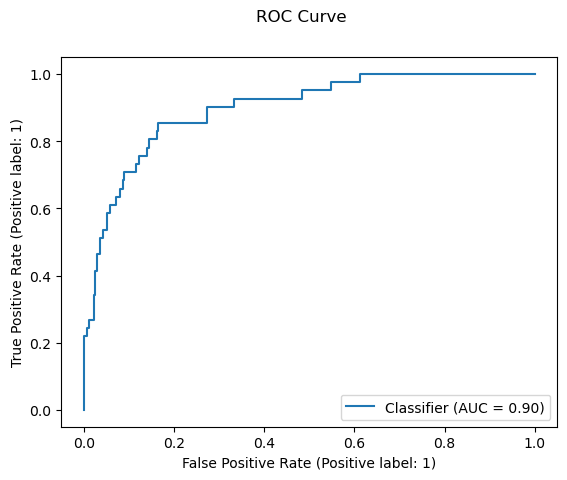

In [37]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_prob = Final_Model.predict_proba(X_test)[:, 1]

# Create ROC curve plot
disp = RocCurveDisplay.from_predictions(Y_test, y_prob)
disp.figure_.suptitle("ROC Curve")
plt.show()


 have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 98%

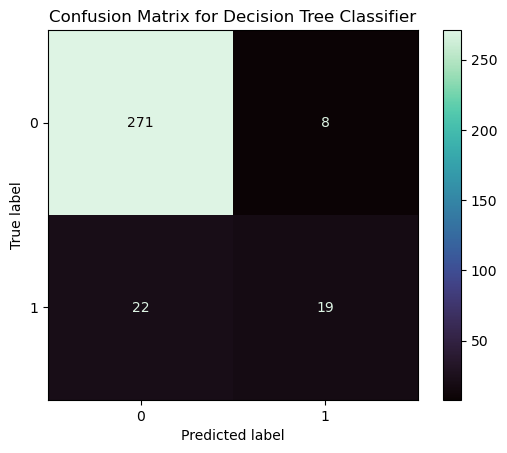

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Calculate confusion matrix
y_pred = Classifier.predict(X_test)
conf_matrix = confusion_matrix(Y_test, y_pred)

# Ensure the correct class names are used
class_names = sorted(set(Y_test))  # Ensure it matches the number of unique classes

# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

# Plot confusion matrix
disp.plot(cmap='mako', values_format='d')  # Use values_format='d' for integer values
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()



With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my model missed to provide the correct prediction (depicting in the black boxes)



In [39]:
filename = "FinalModel_3.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_3.pkl']

In [41]:
#SAVING THE FILE